### Gaussin Classifier
Try fitting uni-variate Gaussian models to the different features of the different classes of the project
dataset. For each class, for each component of the feature vector of that class, compute the ML estimate
for the parameters of a 1D Gaussian distribution. Plot the distribution density (remember that you have
to exponentiate the log-density) on top of the normalized histogram (set density=True when creating
the histogram, see Laboratory 2). What do you observe? Are there features for which the Gaussian densities provide a good fit? Are there features for which the Gaussian model seems significantly less accurate?
Note: for this part of the project, since we are still performing some preliminary, qualitative analysis,
you can compute the ML estimates and the plots either on the whole training set, or on the model
training split of the training dataset. In the following labs we will employ the densities for classification,
and we will need to perform model selection, therefore we will re-compute ML estimates on the model
training portion of the dataset only (see Laboratory 3).


In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
def vcol(x):
    return x.reshape((x.size, 1))

In [36]:
def vrow(x):
    return x.reshape((1, x.size))

In [37]:
def load(filename):
    DList=[]
    lablesList=[]
    #La classe puo cambiare
    with open(filename) as f:
        for line in f:
            line=line.strip()
            try:
                fields=line.split(',')[0:-1] # prendo tutti i campi tranne l'ultimo ovvero l etichetta
                fields=vcol(np.array([float(x) for x in fields]))
                DList.append(fields)
                label=line.split(',')[-1].strip()
                lablesList.append(label)
            except:
                pass
    return np.hstack(DList),np.array(lablesList,dtype=np.int32)
            

In [38]:
#prima di essre processati i dati devono essere spostati nell origini, ovvero avere media 0
def compute_mu_C(X):
    "Calcolo la media e la matrice di covarianza dei dati x"
    mu = vcol(X.mean(1))

    C = ((X-mu)@(X-mu).T)/float(X.shape[1])
    return mu, C

In [39]:
def logpdf_GAU_ND(X, mu, C):
    """
    Compute the log-density of a multivariate Gaussian distribution for multiple samples.
    X is a 2D numpy array where each column is a sample, mu is the mean vector, and C is the covariance matrix.
    Returns a 1D numpy array of log-density values for each sample.
    """
    P=np.linalg.inv(C) #inverse of covariance matrix (Precision matrix)
    return -0.5*X.shape[0]*np.log(2*np.pi)-0.5*np.linalg.slogdet(C)[1]-0.5* ((X-mu) * (P @ (X-mu))).sum(0) 


In [40]:
def loglikelihood(X,mu,C):
    """
    Compute the log-likelihood of the dataset X given the parameters mu and C.
    Returns the log-likelihood value.
    """
    return logpdf_GAU_ND(X, mu, C).sum(0) #sum over all samples

In [41]:
train_data, train_labels = load('trainData.txt')

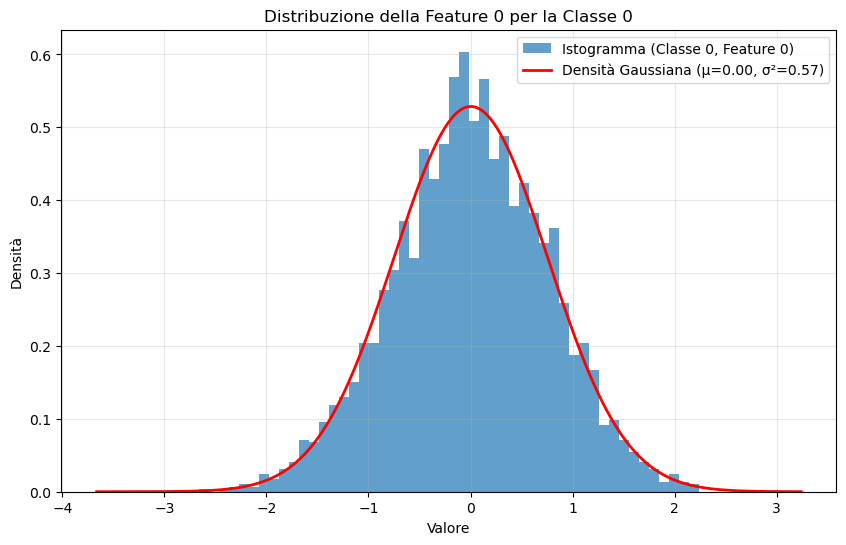

Log-likelihood per Classe 0, Feature 0: -3401.16


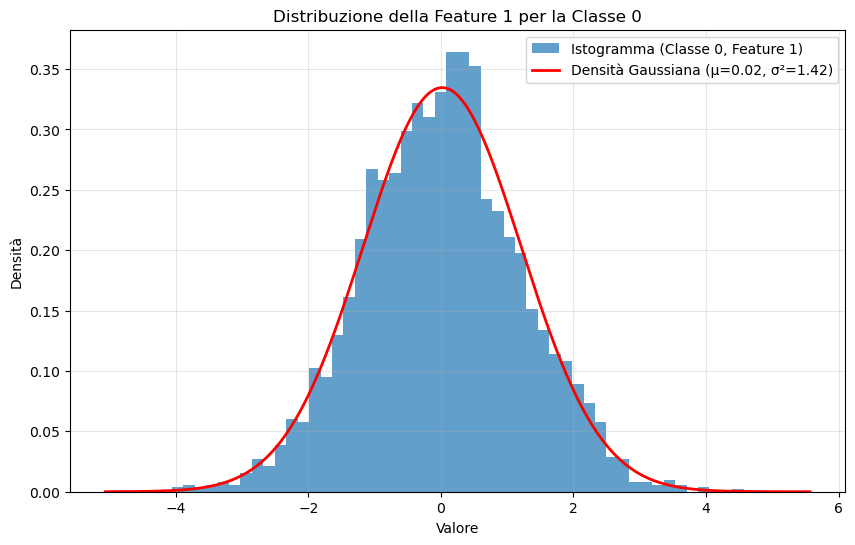

Log-likelihood per Classe 0, Feature 1: -4767.77


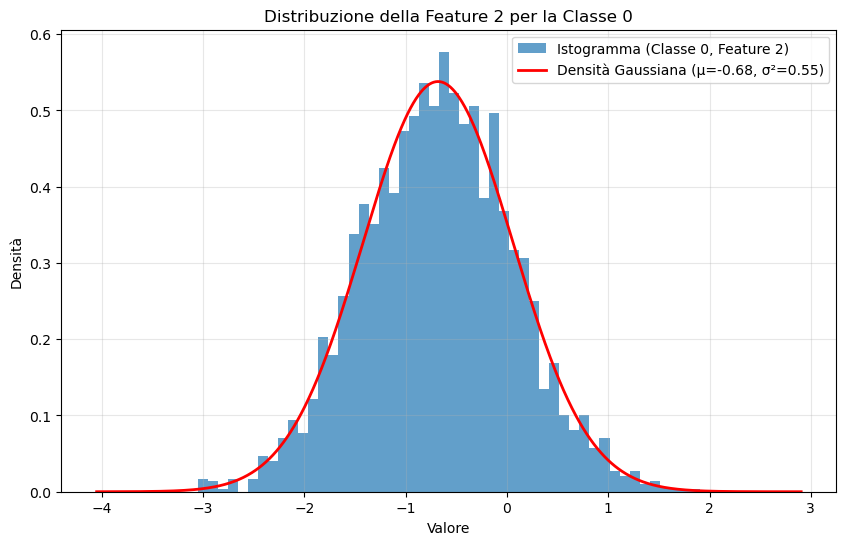

Log-likelihood per Classe 0, Feature 2: -3348.80


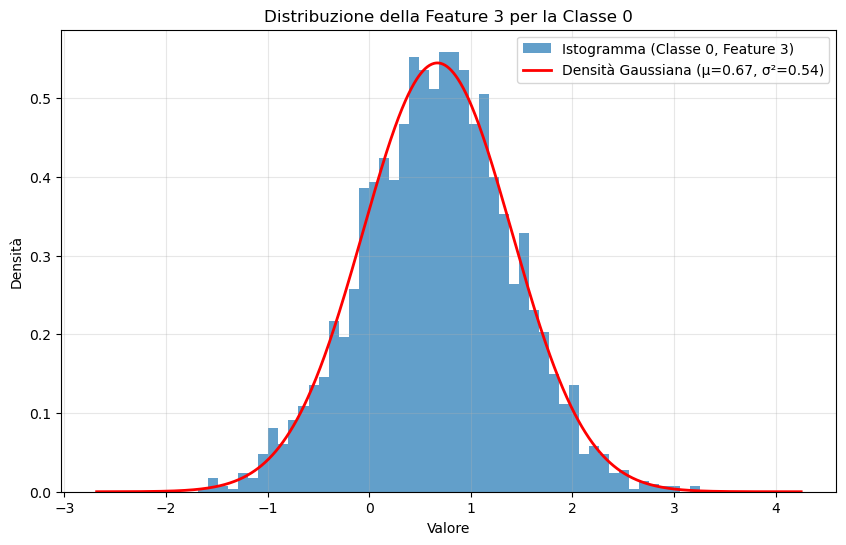

Log-likelihood per Classe 0, Feature 3: -3310.43


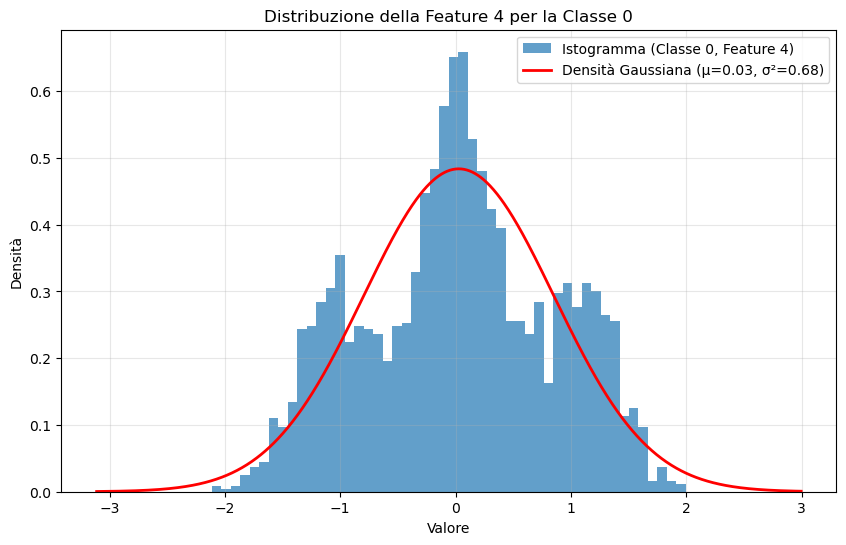

Log-likelihood per Classe 0, Feature 4: -3666.22


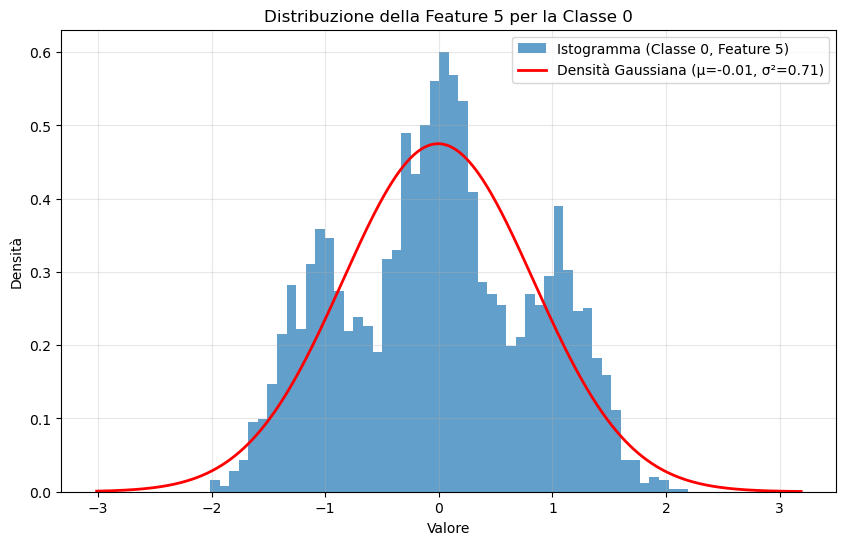

Log-likelihood per Classe 0, Feature 5: -3720.12


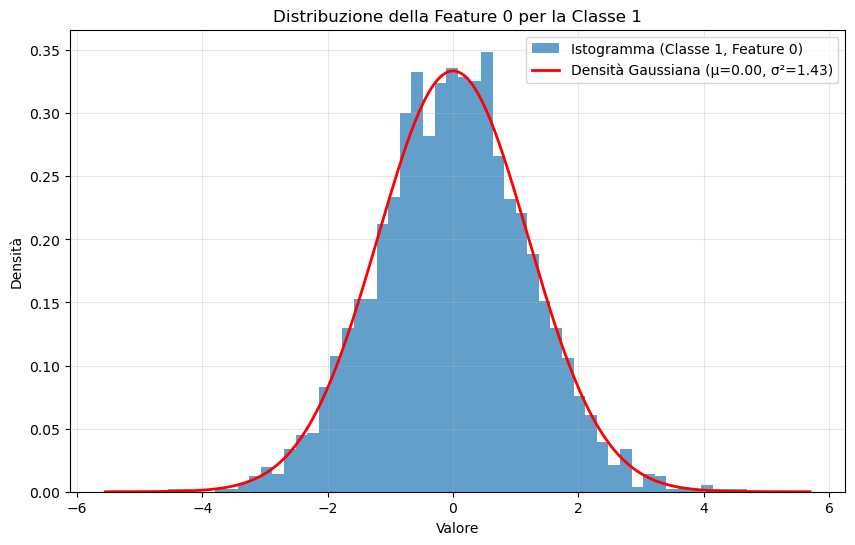

Log-likelihood per Classe 1, Feature 0: -4809.55


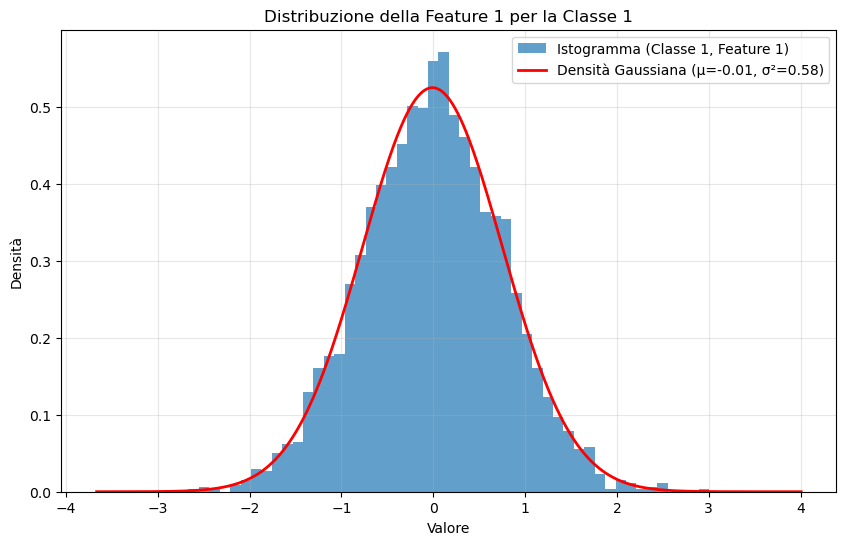

Log-likelihood per Classe 1, Feature 1: -3446.72


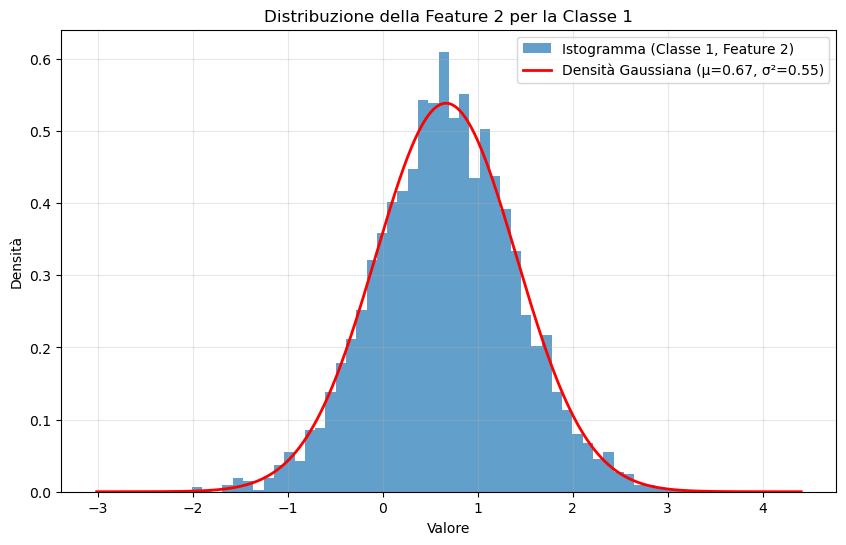

Log-likelihood per Classe 1, Feature 2: -3368.25


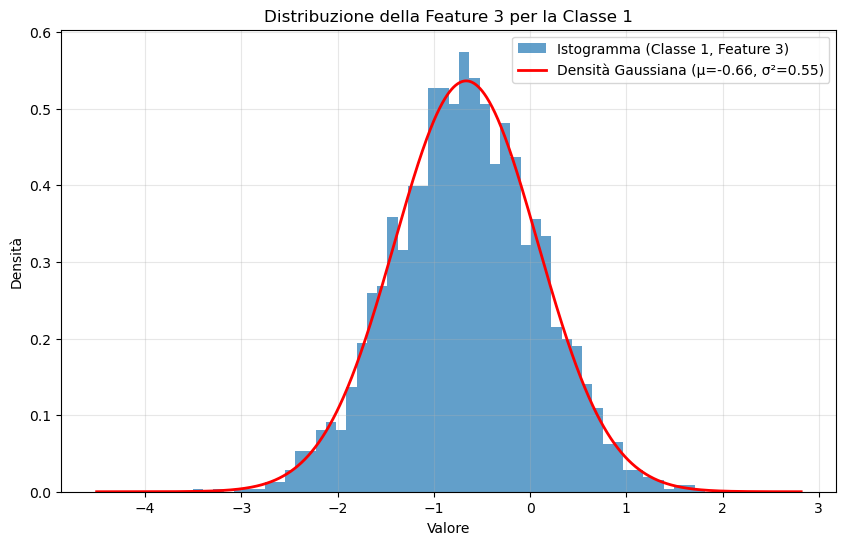

Log-likelihood per Classe 1, Feature 3: -3380.38


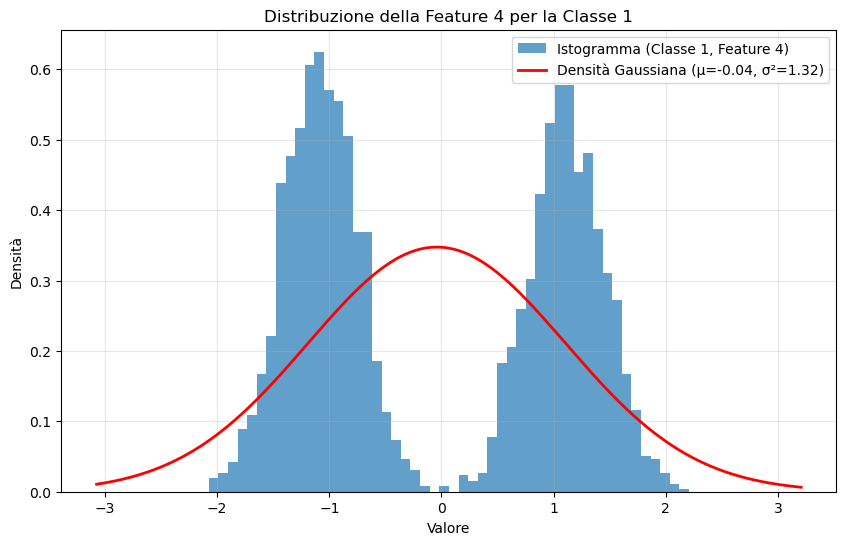

Log-likelihood per Classe 1, Feature 4: -4686.29


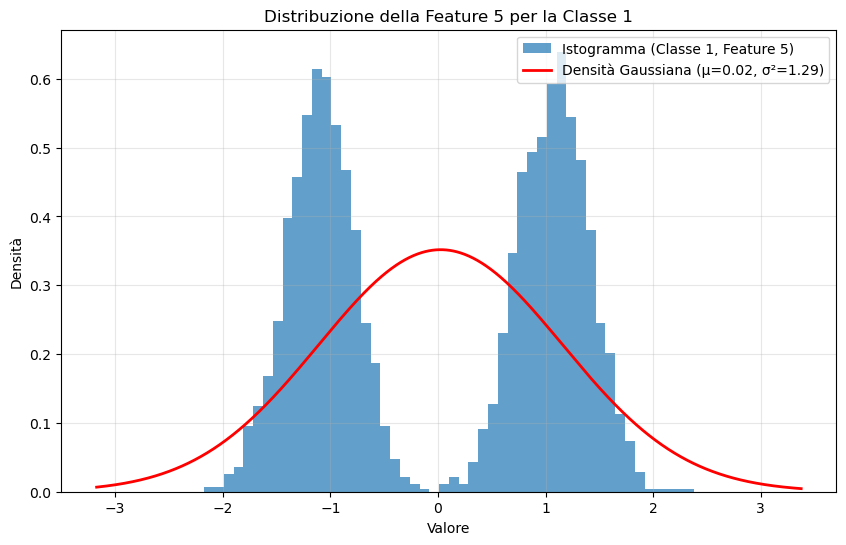

Log-likelihood per Classe 1, Feature 5: -4650.77


In [42]:
for class_label in set(train_labels):  # Assumi che train_labels contenga le etichette delle classi
    # Filtra i dati per classe
    class_data = train_data[:, train_labels == class_label]
    
    # Per ogni caratteristica (dimensione) del vettore
    for feature_idx in range(class_data.shape[0]):
        # Estrai i dati della singola caratteristica
        feature_data = class_data[feature_idx, :].reshape(1, -1)
        
        # Calcola le stime ML per media e covarianza (qui sarà un solo valore essendo univariata)
        mu_ML, C_ML = compute_mu_C(feature_data)
        
        # Visualizza la distribuzione e la densità gaussiana stimata
        plt.figure(figsize=(10, 6))
        
        # Istogramma normalizzato dei dati
        plt.hist(feature_data.ravel(), bins=50, density=True, alpha=0.7, 
                 label=f'Istogramma (Classe {class_label}, Feature {feature_idx})')
        
        # Densità gaussiana stimata
        x_plot = np.linspace(feature_data.min() - 1, feature_data.max() + 1, 1000)
        plt.plot(x_plot.ravel(), 
                 np.exp(logpdf_GAU_ND(vrow(x_plot), mu_ML, C_ML)), 
                 'r', linewidth=2, 
                 label=f'Densità Gaussiana (μ={mu_ML[0, 0]:.2f}, σ²={C_ML[0, 0]:.2f})')
        
        plt.title(f'Distribuzione della Feature {feature_idx} per la Classe {class_label}')
        plt.xlabel('Valore')
        plt.ylabel('Densità')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()
        
        # Calcola e mostra il log-likelihood per questa feature con la densità stimata
        ll = loglikelihood(feature_data, mu_ML, C_ML)
        print(f'Log-likelihood per Classe {class_label}, Feature {feature_idx}: {ll:.2f}')

### Key Findings

The results show a distinct pattern in how well Gaussian distributions fit various features in the dataset:

- **Features 0-3**: These features demonstrate excellent compatibility with Gaussian modeling. The histograms of these features follow normal distribution patterns closely, and the estimated Gaussian densities provide accurate approximations of the underlying data distributions for both classes.

- **Features 4-5**: These features exhibit significant deviations from Gaussian behavior. As evident in the provided visualizations, the data distributions for these features are noticeably non-Gaussian.

### Detailed Analysis of Feature 4 end 5

Feature 4 and 5 particularly demonstrates problematic Gaussian fitting:

- **For Class 1**: The histogram reveals a distinct bimodal distribution with two well-separated peaks centered approximately at -1 and +1. The fitted Gaussian attempts to cover both modes but fails to capture the valley between them and overestimates density in this region while underestimating at the peaks.

- **For Class 0**: While less pronounced than in Class 1, this feature still shows multimodal tendencies with irregular density patterns. The estimated Gaussian  provides only a rough approximation of the overall distribution envelope but misses important structural details.

### Implications

These findings have important implications for classification:

1. For features that follow Gaussian distributions (0-3), generative models based on Gaussian assumptions should perform well.

2. For features with non-Gaussian behavior (4-5), models that rely strictly on Gaussian assumptions may perform sub-optimally. 